In [61]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import numpy as np



In [62]:
 df = pd.read_csv('./data/plantedtrees.csv')

In [63]:
df['Census Tract'] = df['Census Tract'].astype(float).astype(int)
df['Tree #'] = df['Tree #'].astype(float).astype(int)

In [64]:
df.drop(columns=['Other Add. Info.','Census Tract'],inplace=True)

In [65]:
df.dropna(axis=0,how='all',inplace=True)

In [66]:
df['X Coordinate'] = df['X Coordinate'].apply(lambda c: c if c < 0 else c*-1)
df['Y Coordinate'] = df['Y Coordinate'].apply(lambda c: c if c > 0 else c*-1)

In [67]:
geometry = gpd.points_from_xy(df['X Coordinate'], df['Y Coordinate'], crs="EPSG:4326")
gdf = gpd.GeoDataFrame(df,geometry=geometry)
gdf = gdf.to_crs('4269')

In [68]:
gdf

,Tree #,Funder,Scientific Name,Street Address,City,Ownership,X Coordinate,Y Coordinate,DAC Status,Date Planted,Stock Size,planted_by,geometry
0,1,CAL FIRE,Chitalpa tashkentensis,1749 Magnolia,Long Beach,Public,-118.19819,33.78861,1A,2019-03-19,NaN,Conservation Corps of Long Beach,POINT (-118.19819 33.78861)
1,2,CAL FIRE,Chitalpa tashkentensis,1749 Magnolia,Long Beach,Public,-118.19819,33.78851,1A,2019-03-19,NaN,Conservation Corps of Long Beach,POINT (-118.19819 33.78851)
2,3,CAL FIRE,Chitalpa tashkentensis,1640 Magnolia,Long Beach,Public,-118.19804,33.78775,1A,2019-03-19,NaN,Conservation Corps of Long Beach,POINT (-118.19804 33.78775)
3,4,CAL FIRE,Chitalpa tashkentensis,1632 Magnolia,Long Beach,Public,-118.19806,33.78765,1A,2019-03-19,NaN,Conservation Corps of Long Beach,POINT (-118.19806 33.78765)
4,5,CAL FIRE,Chitalpa tashkentensis,1600 Magnolia,Long Beach,Public,-118.19801,33.78873,1A,2019-03-19,NaN,Conservation Corps of Long Beach,POINT (-118.19801 33.78873)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
732,733,CAL FIRE,Quercas Agrifolia,6255 De Forest Ave,Long Beach,Public,-118.20225,33.84829,1A,2020-08-26,NaN,Conservation Corps of Long Beach,POINT (-118.20225 33.84829)
733,734,CAL FIRE,Quercas Agrifolia,6255 De Forest Ave,Long Beach,Public,-118.20222,33.84796,1A,2020-08-26,NaN,Conservation Corps of Long Beach,POINT (-118.20222 33.84796)
734,735,CAL FIRE,Quercas Agrifolia,6255 De Forest Ave,Long Beach,Public,-118.20220,33.84787,1A,2020-08-26,NaN,Conservation Corps of Long Beach,POINT (-118.20220 33.84787)
735,736,Match,Juglans Californica,6255 De Forest Ave,Long Beach,Public,-118.20224,33.84812,1A,2020-08-26,NaN,Conservation Corps of Long Beach,POINT (-118.20224 33.84812)


In [69]:
lbtractsdf = gpd.read_file('./data/lb_tracts.json')


In [74]:
lbtractsdf['geom_saved'] = lbtractsdf['geometry']

In [75]:
lbtractsdf = lbtractsdf.sjoin(gdf,how="inner",predicate="intersects")

In [76]:
lbtreesdf.columns

Index(['Tree #', 'Funder', 'Scientific Name', 'Street Address', 'City',
       'Ownership', 'X Coordinate', 'Y Coordinate', 'DAC Status',
       'Date Planted', 'Stock Size', 'planted_by', 'geometry', 'index_right',
       'GEOID', 'ALAND', 'AWATER', 'INTPTLAT', 'INTPTLON', 'Total Population',
       'White Only Population', 'state', 'county', 'tract',
       'Non White Only Percentage', 'geom_saved'],
      dtype='object')

<AxesSubplot: >

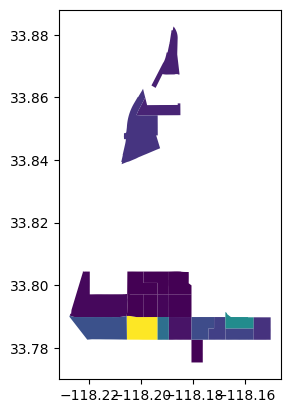

In [98]:
lbtreesdf.dissolve(by='GEOID',aggfunc='count').plot(column='Funder')

In [253]:
tdf.head()

,GEOID,INTPTLAT,INTPTLON,geometry
0,06037573800,+33.8242122,-118.0984125,"POLYGON ((-118.10900 33.81912, -118.10850 33.8..."
1,06037573902,+33.8135353,-118.0775765,"POLYGON ((-118.08155 33.81765, -118.08140 33.8..."
2,06037574000,+33.8144739,-118.1017387,"POLYGON ((-118.11394 33.81370, -118.11373 33.8..."
3,06037574100,+33.8138403,-118.1228270,"POLYGON ((-118.13394 33.81307, -118.13393 33.8..."
4,06037574201,+33.8039240,-118.1276823,"POLYGON ((-118.13397 33.79626, -118.13397 33.7..."


In [254]:
gdf

,Tree #,Funder,Scientific Name,Street Address,City,Ownership,X Coordinate,Y Coordinate,Census Tract,DAC Status,Date Planted,Stock Size,planted_by,geometry
0,1.0,CAL FIRE,Chitalpa tashkentensis,1749 Magnolia,Long Beach,Public,-118.19819,33.78861,6037575401.0,1A,2019-03-19,NaN,Conservation Corps of Long Beach,POINT (-118.19819 33.78861)
1,2.0,CAL FIRE,Chitalpa tashkentensis,1749 Magnolia,Long Beach,Public,-118.19819,33.78851,6037575401.0,1A,2019-03-19,NaN,Conservation Corps of Long Beach,POINT (-118.19819 33.78851)
2,3.0,CAL FIRE,Chitalpa tashkentensis,1640 Magnolia,Long Beach,Public,-118.19804,33.78775,6037575401.0,1A,2019-03-19,NaN,Conservation Corps of Long Beach,POINT (-118.19804 33.78775)
3,4.0,CAL FIRE,Chitalpa tashkentensis,1632 Magnolia,Long Beach,Public,-118.19806,33.78765,6037575401.0,1A,2019-03-19,NaN,Conservation Corps of Long Beach,POINT (-118.19806 33.78765)
4,5.0,CAL FIRE,Chitalpa tashkentensis,1600 Magnolia,Long Beach,Public,-118.19801,33.78873,6037575401.0,1A,2019-03-19,NaN,Conservation Corps of Long Beach,POINT (-118.19801 33.78873)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
732,733.0,CAL FIRE,Quercas Agrifolia,6255 De Forest Ave,Long Beach,Public,-118.20225,33.84829,6037571701.0,1A,2020-08-26,NaN,Conservation Corps of Long Beach,POINT (-118.20225 33.84829)
733,734.0,CAL FIRE,Quercas Agrifolia,6255 De Forest Ave,Long Beach,Public,-118.20222,33.84796,6037571701.0,1A,2020-08-26,NaN,Conservation Corps of Long Beach,POINT (-118.20222 33.84796)
734,735.0,CAL FIRE,Quercas Agrifolia,6255 De Forest Ave,Long Beach,Public,-118.20220,33.84787,6037571701.0,1A,2020-08-26,NaN,Conservation Corps of Long Beach,POINT (-118.20220 33.84787)
735,736.0,Match,Juglans Californica,6255 De Forest Ave,Long Beach,Public,-118.20224,33.84812,6037571701.0,1A,2020-08-26,NaN,Conservation Corps of Long Beach,POINT (-118.20224 33.84812)


In [255]:
gdf.geometry

0      POINT (-118.19819 33.78861)
1      POINT (-118.19819 33.78851)
2      POINT (-118.19804 33.78775)
3      POINT (-118.19806 33.78765)
4      POINT (-118.19801 33.78873)
                  ...             
732    POINT (-118.20225 33.84829)
733    POINT (-118.20222 33.84796)
734    POINT (-118.20220 33.84787)
735    POINT (-118.20224 33.84812)
736    POINT (-118.20221 33.84767)
Name: geometry, Length: 737, dtype: geometry

In [256]:
odf = gdf.sjoin(tdf,how="left",predicate="intersects")

In [257]:
odf

,Tree #,Funder,Scientific Name,Street Address,City,Ownership,X Coordinate,Y Coordinate,Census Tract,DAC Status,Date Planted,Stock Size,planted_by,geometry,index_right,GEOID,INTPTLAT,INTPTLON
0,1.0,CAL FIRE,Chitalpa tashkentensis,1749 Magnolia,Long Beach,Public,-118.19819,33.78861,6037575401.0,1A,2019-03-19,NaN,Conservation Corps of Long Beach,POINT (-118.19819 33.78861),17.0,06037575401,+33.7863532,-118.2001740
1,2.0,CAL FIRE,Chitalpa tashkentensis,1749 Magnolia,Long Beach,Public,-118.19819,33.78851,6037575401.0,1A,2019-03-19,NaN,Conservation Corps of Long Beach,POINT (-118.19819 33.78851),17.0,06037575401,+33.7863532,-118.2001740
2,3.0,CAL FIRE,Chitalpa tashkentensis,1640 Magnolia,Long Beach,Public,-118.19804,33.78775,6037575401.0,1A,2019-03-19,NaN,Conservation Corps of Long Beach,POINT (-118.19804 33.78775),17.0,06037575401,+33.7863532,-118.2001740
3,4.0,CAL FIRE,Chitalpa tashkentensis,1632 Magnolia,Long Beach,Public,-118.19806,33.78765,6037575401.0,1A,2019-03-19,NaN,Conservation Corps of Long Beach,POINT (-118.19806 33.78765),17.0,06037575401,+33.7863532,-118.2001740
4,5.0,CAL FIRE,Chitalpa tashkentensis,1600 Magnolia,Long Beach,Public,-118.19801,33.78873,6037575401.0,1A,2019-03-19,NaN,Conservation Corps of Long Beach,POINT (-118.19801 33.78873),17.0,06037575401,+33.7863532,-118.2001740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
732,733.0,CAL FIRE,Quercas Agrifolia,6255 De Forest Ave,Long Beach,Public,-118.20225,33.84829,6037571701.0,1A,2020-08-26,NaN,Conservation Corps of Long Beach,POINT (-118.20225 33.84829),77.0,06037571701,+33.8478820,-118.1994430
733,734.0,CAL FIRE,Quercas Agrifolia,6255 De Forest Ave,Long Beach,Public,-118.20222,33.84796,6037571701.0,1A,2020-08-26,NaN,Conservation Corps of Long Beach,POINT (-118.20222 33.84796),77.0,06037571701,+33.8478820,-118.1994430
734,735.0,CAL FIRE,Quercas Agrifolia,6255 De Forest Ave,Long Beach,Public,-118.20220,33.84787,6037571701.0,1A,2020-08-26,NaN,Conservation Corps of Long Beach,POINT (-118.20220 33.84787),77.0,06037571701,+33.8478820,-118.1994430
735,736.0,Match,Juglans Californica,6255 De Forest Ave,Long Beach,Public,-118.20224,33.84812,6037571701.0,1A,2020-08-26,NaN,Conservation Corps of Long Beach,POINT (-118.20224 33.84812),77.0,06037571701,+33.8478820,-118.1994430


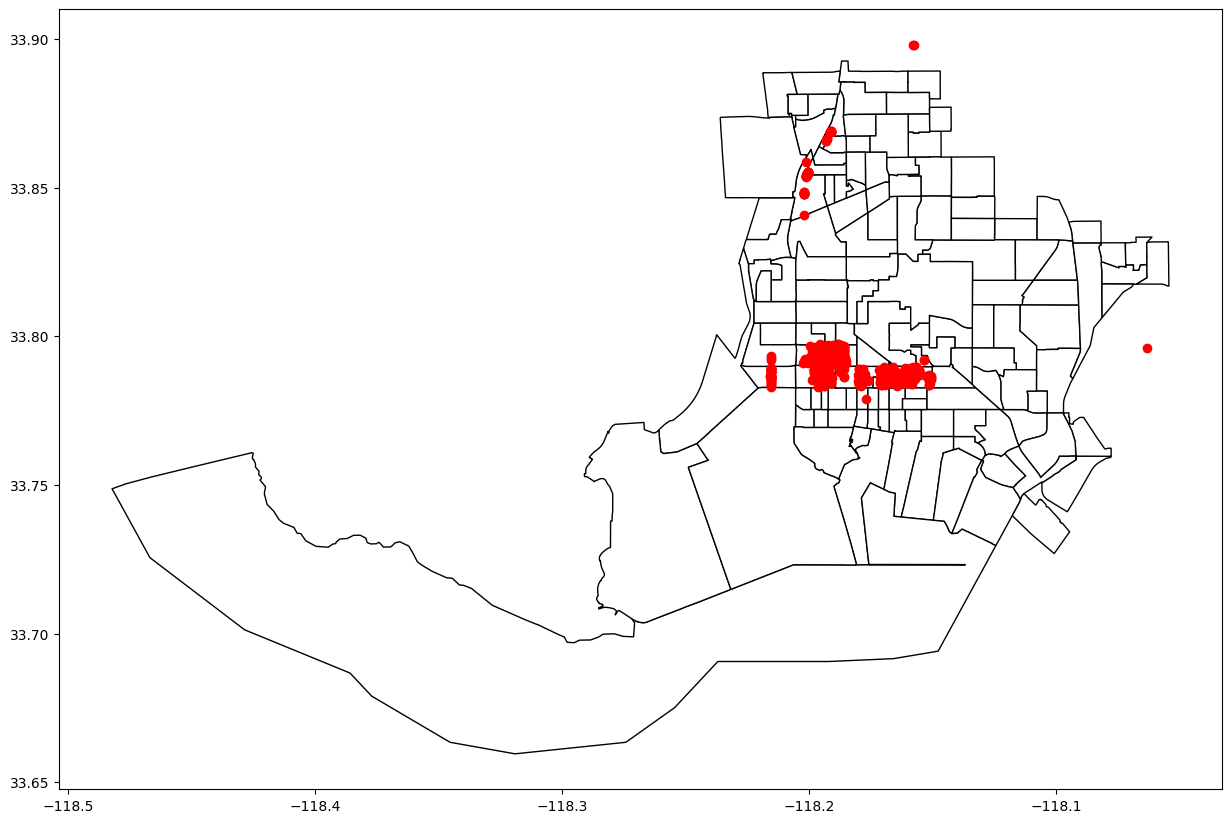

In [258]:
ax = tdf.plot(figsize=(15,15),color='white',edgecolor='black')
gdf[(gdf['X Coordinate'] <= -118.0) & (gdf['X Coordinate'] > -118.3)].plot(ax=ax,marker='o',color='red')
plt.show()

In [259]:
df.sort_values(by='X Coordinate',ascending=True)

,Tree #,Funder,Scientific Name,Street Address,City,Ownership,X Coordinate,Y Coordinate,Census Tract,DAC Status,Date Planted,Stock Size,planted_by,geometry
549,550.0,NaN,Lagerstroemia indica,2106 Daisy Ave,Long Beach,Public,-188.19928,33.795640,6007000700,1A,2020-07-23,15-Gallon,Conservation Corps of Long Beach,POINT (-188.19928 33.79564)
538,539.0,NaN,Lagerstroemia indica,2022 Magnolia Ave,Long Beach,Public,-188.19773,33.794020,6007000700,1A,2020-07-09,15-Gallon,Conservation Corps of Long Beach,POINT (-188.19773 33.79402)
197,198.0,CAL FIRE,PISTACIA CHINENSIS,1700 Temple Ave,Long Beach,Public,-118.86584,33.788502,6037575101,1A,2020-03-30,NaN,Conservation Corps of Long Beach,POINT (-118.86584 33.78850)
234,235.0,CAL FIRE,Tristania Conferta,3320 Ransom Ave,Long Beach,Public,-118.53006,33.786654,6037575103,1A,2020-03-09,NaN,Conservation Corps of Long Beach,POINT (-118.53006 33.78665)
241,242.0,CAL FIRE,Lagerstroemia,1650 Santa Fe Ave.,Long Beach,Public,-118.21580,33.786600,6037575500,1A,2020-03-16,NaN,Conservation Corps of Long Beach,POINT (-118.21580 33.78660)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428,429.0,CAL FIRE,Brachychiton Populneus,3524 15th street,Long Beach,Public,-118.15067,33.785710,6037575103,1A,2020-05-07,NaN,Conservation Corps of Long Beach,POINT (-118.15067 33.78571)
674,675.0,NaN,Brachychiton populneus,3524 15th st,Long Beach,Public,-118.15067,33.785710,6007000700,1A,2020-09-16,15-Gallon,Conservation Corps of Long Beach,POINT (-118.15067 33.78571)
368,369.0,CAL FIRE,Quercus Virginana,2799 15th street,Long Beach,Public,-118.15067,33.786390,6037575101,1A,2020-05-07,NaN,Conservation Corps of Long Beach,POINT (-118.15067 33.78639)
335,336.0,CAL FIRE,Quercus Virginana,1601 Loma ave,Long Beach,Public,-118.15051,33.786750,6037575103,1A,2020-04-23,NaN,Conservation Corps of Long Beach,POINT (-118.15051 33.78675)


In [260]:
#gdf['X Coordinate'] > -118.3
gdf[(gdf['X Coordinate'] <= -118.0) & (gdf['X Coordinate'] > -118.3)]

,Tree #,Funder,Scientific Name,Street Address,City,Ownership,X Coordinate,Y Coordinate,Census Tract,DAC Status,Date Planted,Stock Size,planted_by,geometry
0,1.0,CAL FIRE,Chitalpa tashkentensis,1749 Magnolia,Long Beach,Public,-118.19819,33.78861,6037575401.0,1A,2019-03-19,NaN,Conservation Corps of Long Beach,POINT (-118.19819 33.78861)
1,2.0,CAL FIRE,Chitalpa tashkentensis,1749 Magnolia,Long Beach,Public,-118.19819,33.78851,6037575401.0,1A,2019-03-19,NaN,Conservation Corps of Long Beach,POINT (-118.19819 33.78851)
2,3.0,CAL FIRE,Chitalpa tashkentensis,1640 Magnolia,Long Beach,Public,-118.19804,33.78775,6037575401.0,1A,2019-03-19,NaN,Conservation Corps of Long Beach,POINT (-118.19804 33.78775)
3,4.0,CAL FIRE,Chitalpa tashkentensis,1632 Magnolia,Long Beach,Public,-118.19806,33.78765,6037575401.0,1A,2019-03-19,NaN,Conservation Corps of Long Beach,POINT (-118.19806 33.78765)
4,5.0,CAL FIRE,Chitalpa tashkentensis,1600 Magnolia,Long Beach,Public,-118.19801,33.78873,6037575401.0,1A,2019-03-19,NaN,Conservation Corps of Long Beach,POINT (-118.19801 33.78873)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
732,733.0,CAL FIRE,Quercas Agrifolia,6255 De Forest Ave,Long Beach,Public,-118.20225,33.84829,6037571701.0,1A,2020-08-26,NaN,Conservation Corps of Long Beach,POINT (-118.20225 33.84829)
733,734.0,CAL FIRE,Quercas Agrifolia,6255 De Forest Ave,Long Beach,Public,-118.20222,33.84796,6037571701.0,1A,2020-08-26,NaN,Conservation Corps of Long Beach,POINT (-118.20222 33.84796)
734,735.0,CAL FIRE,Quercas Agrifolia,6255 De Forest Ave,Long Beach,Public,-118.20220,33.84787,6037571701.0,1A,2020-08-26,NaN,Conservation Corps of Long Beach,POINT (-118.20220 33.84787)
735,736.0,Match,Juglans Californica,6255 De Forest Ave,Long Beach,Public,-118.20224,33.84812,6037571701.0,1A,2020-08-26,NaN,Conservation Corps of Long Beach,POINT (-118.20224 33.84812)


<AxesSubplot: >

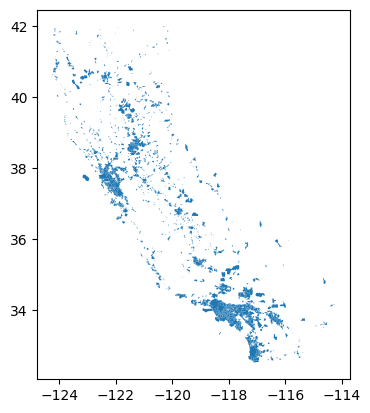

In [261]:
url_msa = r'https://www2.census.gov/geo/tiger/TIGER2020/PLACE/tl_2020_06_place.zip'
msa = gpd.read_file(url_msa)
msa.plot()

In [262]:
lb = msa[msa.GEOID=='0643000']

In [263]:
tractsurl = r'https://www2.census.gov/geo/tiger/TIGER2020/TRACT/tl_2020_06_tract.zip'
tracts = gpd.read_file(tractsurl)



In [264]:
lbonly = tracts.sjoin(lb,how="inner",predicate="contains")

In [265]:
lbonly.plot()

/Users/nish/.local/share/virtualenvs/treedata-X23m-u1Y/lib/python3.10/site-packages/geopandas/plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


<AxesSubplot: >

Error in callback <function _draw_all_if_interactive at 0x13dcce3b0> (for post_execute):


ValueError: cannot convert float NaN to integer

ValueError: cannot convert float NaN to integer

<Figure size 640x480 with 1 Axes>